The goal this week is to look at some more visualisation methods.

We will follow examples from [this Python Seaborn tutorial](https://elitedatascience.com/python-seaborn-tutorial) by EliteDataScience.   [Seaborn](https://seaborn.pydata.org/) is a Python library that sits on top of matplotlib and Pandas and gives us a richer collection of plots than the basic plot method.   Unfortunately (for us), there has just (July 2018) been a new release of Seaborn that is incompatible with the version installed in Anaconda; the official tutorial and documentation refer to the new version so it is a bit hard to find help.  Luckily the tutorial I've linked above is a pretty good walk through of the major plot styles so should be useful.  You can find documentation and examples of the older version of Seaborn via the [Internet Archive Wayback Machine](https://web.archive.org/web/20180630204548/http://seaborn.pydata.org/).  

I've downloaded the Pokemon dataset from the tutorial and included it in this repository.   I had to edit the file a little since it had some unicode characters in that blocked the load.  The first few cells here import this file.

In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [10]:
df = pd.read_csv('files/Pokemon.csv', index_col=0)

In [11]:
df.head()

,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Stage,Legendary
1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,2,False
3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,3,False
4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
5,Charmeleon,Fire,NaN,405,58,64,58,80,65,80,2,False


Now step through the examples in the tutorial to learn a little about the plot methods available in Seaborn.  

# Seaborn's plotting functions

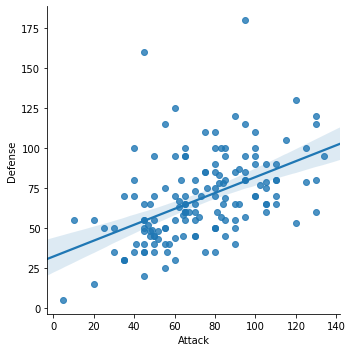

In [12]:
import seaborn as sns
sns.lmplot(x='Attack', y='Defense', data=df)

# Customizing with Matplotlib

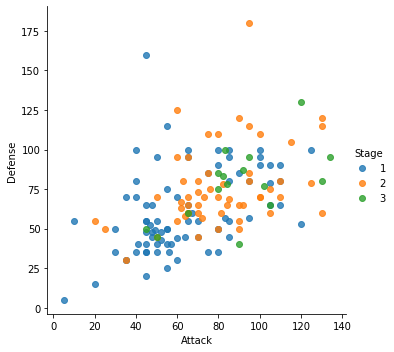

In [13]:
sns.lmplot(x='Attack', y='Defense', data=df,
           fit_reg=False, 
           hue='Stage')

(0, 141.9881096001028)

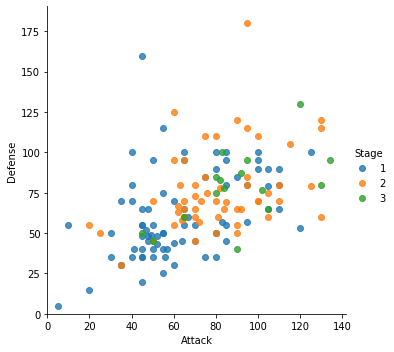

In [14]:
sns.lmplot(x='Attack', y='Defense', data=df,
           fit_reg=False, 
           hue='Stage')
plt.ylim(0, None)
plt.xlim(0, None)

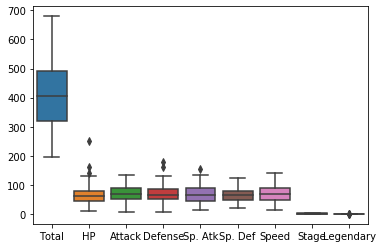

In [15]:
sns.boxplot(data=df)

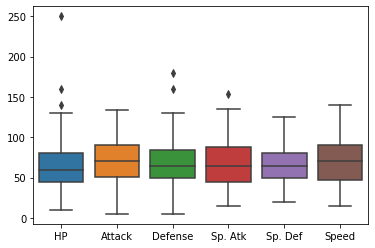

In [16]:
stats_df = df.drop(['Total', 'Stage', 'Legendary'], axis=1)
sns.boxplot(data=stats_df)

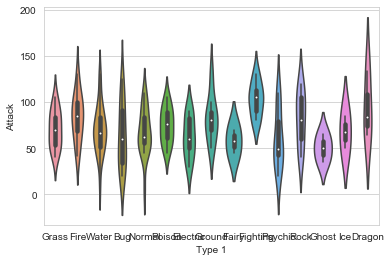

In [17]:
sns.set_style('whitegrid')
sns.violinplot(x='Type 1', y='Attack', data=df)

In [18]:
pkmn_type_colors = ['#78C850',  
                    '#F08030',  
                    '#6890F0',  
                    '#A8B820',  
                    '#A8A878',  
                    '#A040A0',  
                    '#F8D030',  
                    '#E0C068',  
                    '#EE99AC',  
                    '#C03028',  
                    '#F85888',  
                    '#B8A038',  
                    '#705898',  
                    '#98D8D8',  
                    '#7038F8',  
                   ]

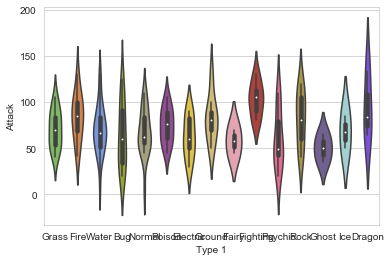

In [19]:
sns.violinplot(x='Type 1', y='Attack', data=df, 
               palette=pkmn_type_colors)

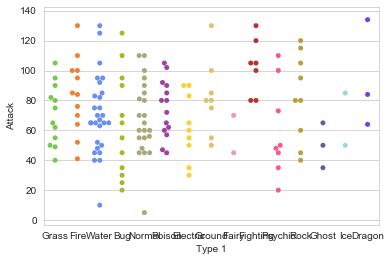

In [20]:
sns.swarmplot(x='Type 1', y='Attack', data=df, 
              palette=pkmn_type_colors)

Text(0.5, 1.0, 'Attack by Type')

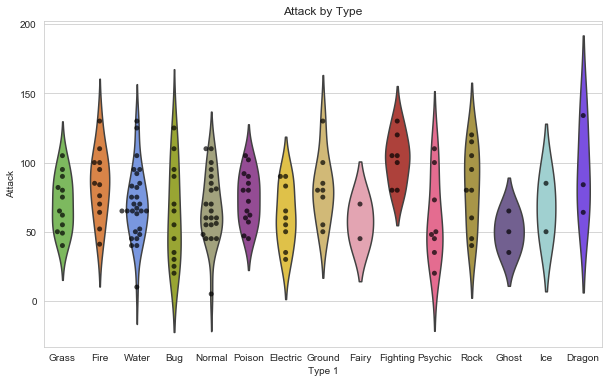

In [21]:
plt.figure(figsize=(10,6))
 
sns.violinplot(x='Type 1',
               y='Attack', 
               data=df, 
               inner=None, 
               palette=pkmn_type_colors)
 
sns.swarmplot(x='Type 1', 
              y='Attack', 
              data=df, 
              color='k', 
              alpha=0.7) 
plt.title('Attack by Type')

In [22]:
stats_df.head()

,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed
1,Bulbasaur,Grass,Poison,45,49,49,65,65,45
2,Ivysaur,Grass,Poison,60,62,63,80,80,60
3,Venusaur,Grass,Poison,80,82,83,100,100,80
4,Charmander,Fire,NaN,39,52,43,60,50,65
5,Charmeleon,Fire,NaN,58,64,58,80,65,80


In [23]:
melted_df = pd.melt(stats_df, 
                    id_vars=["Name", "Type 1", "Type 2"], # Variables to keep
                    var_name="Stat") # Name of melted variable
melted_df.head()

,Name,Type 1,Type 2,Stat,value
0,Bulbasaur,Grass,Poison,HP,45
1,Ivysaur,Grass,Poison,HP,60
2,Venusaur,Grass,Poison,HP,80
3,Charmander,Fire,NaN,HP,39
4,Charmeleon,Fire,NaN,HP,58


In [24]:
print( stats_df.shape )
print( melted_df.shape )

(151, 9)
(906, 5)


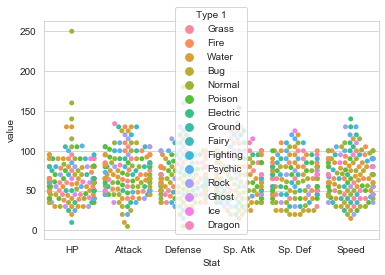

In [25]:
sns.swarmplot(x='Stat', y='value', data=melted_df, 
              hue='Type 1')

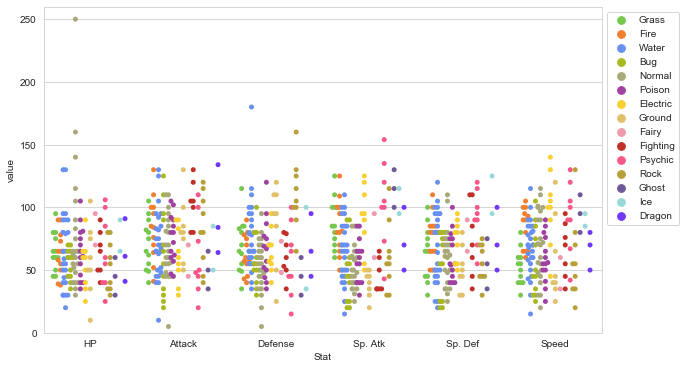

In [36]:

plt.figure(figsize=(10,6))
 
sns.swarmplot(x='Stat', 
              y='value', 
              data=melted_df, 
              hue='Type 1', 
              split=True, # 2. Separate points by hue
              palette=pkmn_type_colors) # 3. Use Pokemon palette
 
# 4. Adjust the y-axis
plt.ylim(0, 260)
 
# 5. Place legend to the right
plt.legend(bbox_to_anchor=(1, 1), loc=2)

# Heatmap

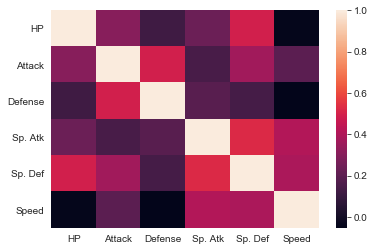

In [29]:
corr = stats_df.corr()
 
# Heatmap
sns.heatmap(corr)

## Plot Size and Title

One thing you may want to do is to change the plot size which by default can be a bit small.  You should also add titles to your plots and make sure they have good X and Y axis labels.  Here's an example of how you can do this.  Play around with these settings to see their effect.  (Note that I get a warning about deprecated arguements when running this, that's ok).

You might also want to experiment with different figure styles to find something you like.  Here is the [Seaborn documentation](https://web.archive.org/web/20180621043054/https://seaborn.pydata.org/tutorial/aesthetics.html#seaborn-figure-styles) on that for the version in Anaconda.

Text(0.5, 1.0, 'Distribution of Speed for Pokemon')

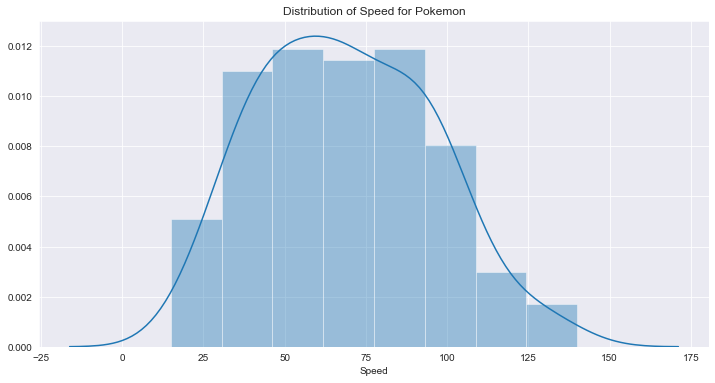

In [27]:
plt.figure(figsize=(12,6))
with sns.axes_style('darkgrid'):
    sns.distplot(df.Speed)
plt.title("Distribution of Speed for Pokemon")

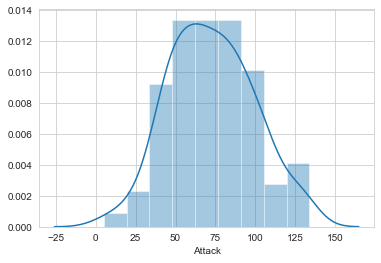

In [28]:
sns.distplot(df.Attack)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 <a list of 15 Text xticklabel objects>)

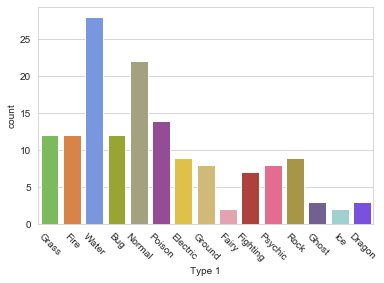

In [37]:
sns.countplot(x='Type 1', data=df, palette=pkmn_type_colors)
 
# Rotate x-labels
plt.xticks(rotation=-45)

# Factor Plot

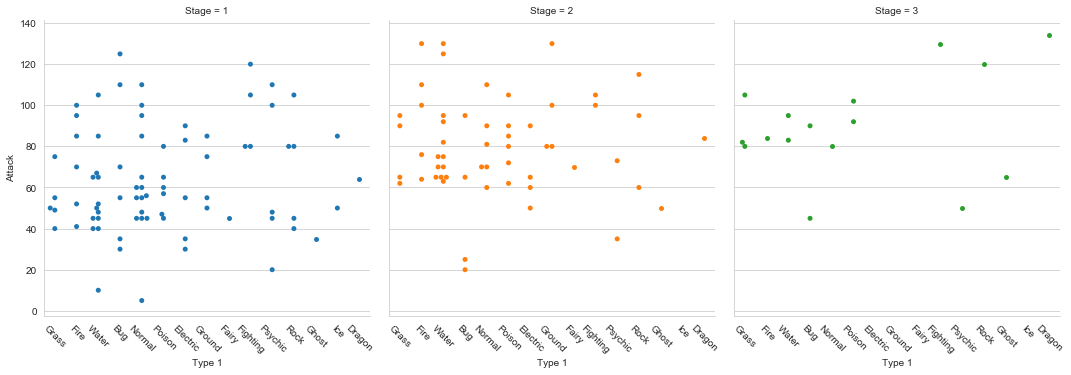

In [31]:
# Factor Plot
g = sns.factorplot(x='Type 1', 
                   y='Attack', 
                   data=df, 
                   hue='Stage',  # Color by stage
                   col='Stage',  # Separate by stage
                   kind='swarm') # Swarmplot
g.set_xticklabels(rotation=-45)

# Density Plot

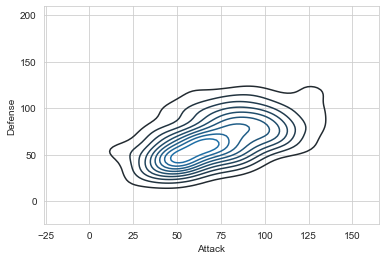

In [32]:
sns.kdeplot(df.Attack, df.Defense)

# Joint Distribution Plot

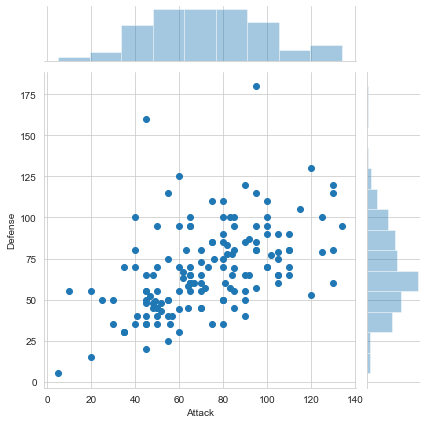

In [33]:
sns.jointplot(x='Attack', y='Defense', data=df)